<a href="https://colab.research.google.com/github/Labibbib/Case-Study-03-Group-F/blob/main/CS3_part1_LinearRegression_GroupF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Kelompok G Case Study 3**
| Nama | NIM | Kelas |
| -------- | -------- | -------- |
| Ibnullabib  | 11220940000037   | DS 2   |
| Putri Maesaroh   | 11220940000046   | DS 1   |
| Uswatun Hasanah  | 11220940000053   | DS 1   |
| Awalia Damayanti   | 11220940000063 | D2 2   |



# Pendahuluan

Studi Kasus Data Mining - Supervised learning¶
Data adalah " modifikasi " (Wrangling) dari data: https://www.kaggle.com/competitions/ashrae-energy-prediction/data

Sehingga permasalahan dan data understanding sama dengan asal data. Perbedaan data yang akan digunakan pada studi kasus kita adalah data yang akan digunakan adalah data "rata-rata" penggunaan energi listrik dari berbagai gedung ( tidak lagi time-series ).

Lakukan proses Data Mining dengan menggunakan seluruh metode yang relevan/sesuai dan telah anda pelajari selama kuliah Data Mining hingga pertemuan minggu ini.

Perlu diingat kembali bahwa dalam data mining tugas utama anda adalah mencari informasi/insight "non-trivial" sebanyak-banyaknya. Untuk hal tersebut anda perlu mendapatkan model yang optimal, tapi BUKAN mendapatkan model yang paling akurat (seperti machine learning).


# Data Understanding


- building_id - Foreign key for the building metadata.
- meter_reading - The target variable. Energy consumption in kWh (or equivalent). Note that this is real data with measurement error, which we expect will impose a baseline level of modeling error. UPDATE: as discussed here, the site 0 electric meter readings are in kBTU.
- primary_use - Indicator of the primary category of activities for the building based on EnergyStar property type definitions
- square_feet - Gross floor area of the building
- year_built - Year building was opened
- floor_count - Number of floors of the building
- air_temperature - Degrees Celsius
- cloud_coverage - Portion of the sky covered in clouds, in oktas
- dew_temperature - Degrees Celsius
- precip_depth_1_hr - Millimeters
- sea_level_pressure - Millibar/hectopascals
- wind_direction - Compass direction (0-360)
- wind_speed - Meters per second
Beberapa variabel dan observasi dari data asal hilang karena tidak lagi relevant setelah proses wrangling.

Baca lebih lanjut disini: https://www.kaggle.com/competitions/ashrae-energy-prediction/overview

# Import dan PreProcessing Data

In [1]:
# Import Modul
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load Data dan Lihat data
import pandas as pd
file_ = 'data/Ashrae_Energy_Mean.csv'
try: #Loading Locally
    df = pd.read_csv(file_)
except Exception as err_:
    print(err_, " Trying to load data from GitHub.")
    !mkdir data
    !wget -P data/ https://raw.githubusercontent.com/taudataanalytics/Data-Mining--Penambangan-Data--Ganjil-2024/master/data/Ashrae_Energy_Mean.csv
    df = pd.read_csv(file_)
print(df.shape)
df.head()

[Errno 2] No such file or directory: 'data/Ashrae_Energy_Mean.csv'  Trying to load data from GitHub.
--2024-11-24 15:15:30--  https://raw.githubusercontent.com/taudataanalytics/Data-Mining--Penambangan-Data--Ganjil-2024/master/data/Ashrae_Energy_Mean.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 241207 (236K) [text/plain]
Saving to: ‘data/Ashrae_Energy_Mean.csv’

Ashrae_Energy_Mean. 100%[===================>] 235.55K  --.-KB/s    in 0.03s   

2024-11-24 15:15:30 (7.83 MB/s) - ‘data/Ashrae_Energy_Mean.csv’ saved [241207/241207]

(1413, 12)


,meter_reading,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,237.749127,Education,7432,2008.0,NaN,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472
1,118.553743,Education,2720,2004.0,NaN,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472
2,23.626500,Education,5376,1991.0,NaN,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472
3,382.736016,Education,23685,2002.0,NaN,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472
4,1579.174237,Education,116607,1975.0,NaN,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472


In [3]:
# Mengoreksi Tipe Variabel
print ("sebelum di ubah\n")
print(df.info())
df['primary_use'] = df['primary_use'].astype('category')
df['year_built'] = pd.to_numeric(df['year_built'], errors='ignore') # jika ada Nan, abaikan
print("\n")
print("setelah di ubah\n")
print(df.dtypes)

sebelum di ubah

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1413 entries, 0 to 1412
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   meter_reading       1413 non-null   float64
 1   primary_use         1413 non-null   object 
 2   square_feet         1413 non-null   int64  
 3   year_built          663 non-null    float64
 4   floor_count         352 non-null    float64
 5   air_temperature     1413 non-null   float64
 6   cloud_coverage      1396 non-null   float64
 7   dew_temperature     1413 non-null   float64
 8   precip_depth_1_hr   1237 non-null   float64
 9   sea_level_pressure  1324 non-null   float64
 10  wind_direction      1413 non-null   float64
 11  wind_speed          1413 non-null   float64
dtypes: float64(10), int64(1), object(1)
memory usage: 132.6+ KB
None


setelah di ubah

meter_reading          float64
primary_use           category
square_feet              int64
year_bui

<ipython-input-3-87f25af8fd47>:5: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df['year_built'] = pd.to_numeric(df['year_built'], errors='ignore') # jika ada Nan, abaikan


In [4]:
# Duplikasi Data
print(df.shape)
df.duplicated().sum()

# Tidak ditemukan data duplikat

(1413, 12)


0

In [5]:
# Noise
for column in df.columns:
    print(f"Nilai unik untuk kolom '{column}':")
    print(df[column].unique())
    print("\n")

Nilai unik untuk kolom 'meter_reading':
[237.7491275  118.55374309  23.62649987 ...   7.21134691 187.11799411
   3.33859478]


Nilai unik untuk kolom 'primary_use':
['Education', 'Lodging/residential', 'Office', 'Entertainment/public assembly', 'Other', ..., 'Healthcare', 'Utility', 'Technology/science', 'Manufacturing/industrial', 'Services']
Length: 16
Categories (16, object): ['Education', 'Entertainment/public assembly',
                          'Food sales and service', 'Healthcare', ..., 'Services', 'Technology/science',
                          'Utility', 'Warehouse/storage']


Nilai unik untuk kolom 'square_feet':
[ 7432  2720  5376 ... 11265 29775 92271]


Nilai unik untuk kolom 'year_built':
[2008. 2004. 1991. 2002. 1975. 2000. 1981. 1989. 2003. 2010. 1968. 1999.
 2013. 1974. 1996. 1980. 1977. 1990. 1985. 2001. 1969. 2005. 2016. 2006.
 2014. 1970. 1971. 2011. 1997. 2007. 1998. 2009. 1979. 1986. 1982. 1983.
   nan 1913. 1953. 1909. 1958. 1960. 1976. 1906. 1900. 1995. 1956. 1

(1413, 12)


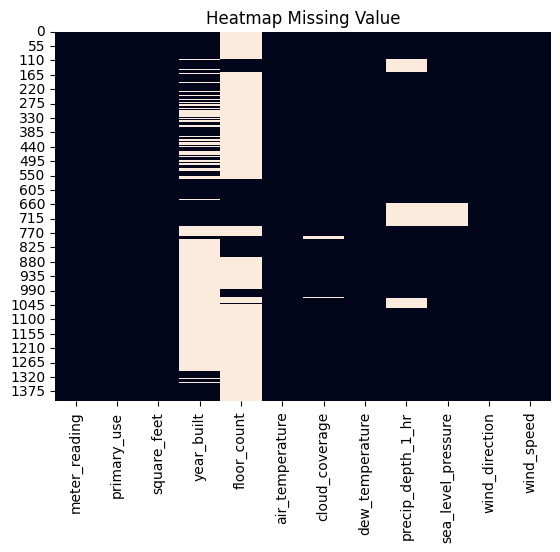

meter_reading            0
primary_use              0
square_feet              0
year_built             750
floor_count           1061
air_temperature          0
cloud_coverage          17
dew_temperature          0
precip_depth_1_hr      176
sea_level_pressure      89
wind_direction           0
wind_speed               0
dtype: int64


meter_reading          0.000000
primary_use            0.000000
square_feet            0.000000
year_built            53.078556
floor_count           75.088464
air_temperature        0.000000
cloud_coverage         1.203114
dew_temperature        0.000000
precip_depth_1_hr     12.455768
sea_level_pressure     6.298655
wind_direction         0.000000
wind_speed             0.000000
dtype: float64
Columns with more than 50% missing values: ['year_built', 'floor_count']
Dimensi data setelah penanganan missing value : (228, 12)


<ipython-input-6-a4960b4658eb>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].median())


In [6]:
# Missing Value
print(df.shape)

sns.heatmap(df.isnull(), cbar=False)
plt.title('Heatmap Missing Value')
plt.show()

# Jumlah Missing Value
print(df.isnull().sum())
print("\n")
persentase_missing = df.isnull().mean() * 100
print(persentase_missing)

# Identifikasi kolom dengan lebih dari 50% missing value
kolom_mv_lebih_dari_50 = persentase_missing[persentase_missing > 50].index
print(f"Columns with more than 50% missing values: {list(kolom_mv_lebih_dari_50)}")

# Drop baris yang mengandung NaN pada kolom tersebut
df = df.dropna(subset=kolom_mv_lebih_dari_50)

# Imputasi missing value dengan median untuk semua kolom numerik
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Imputasi missing value dengan median hanya untuk kolom numerik
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].median())

print("Dimensi data setelah penanganan missing value :", df.shape)



<ipython-input-7-ee73a8992e9a>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  p = sns.distplot(df['meter_reading'], kde=True, rug=True)




Banyak data setelah outlier dibuang : (194, 12)
Banyak data outlier : (34, 12)


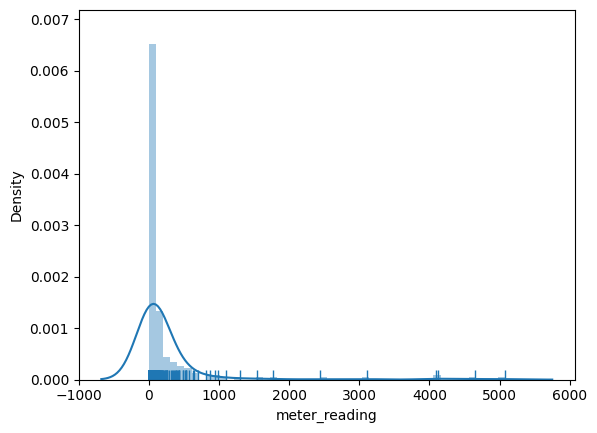

In [7]:
# Outlier
p = sns.distplot(df['meter_reading'], kde=True, rug=True)

# Memisahkan Outlier
Q1 = df["meter_reading"].quantile(0.25)
Q2 = df["meter_reading"].quantile(0.50)
Q3 = df["meter_reading"].quantile(0.75)
IQR = Q3 - Q1 #IQR is interquartile range.

no_outlier = (df["meter_reading"] >= Q1 - 1.5 * IQR) & (df["meter_reading"] <= Q3 + 1.5 *IQR)

# Creating DataFrame Without Outliers
df_no_outlier = df[no_outlier]

# Creating DataFrame With Outliers
df_outlier = df[~no_outlier]

print("\n")
print("Banyak data setelah outlier dibuang :", df_no_outlier.shape)
print("Banyak data outlier :", df_outlier.shape)

# Outlier dipisahkan karena model regresi linier tidak robust terhapat outlier

In [8]:
#statistik deskriptif
def stat_desk (df) :
  print (df.describe())
  print("\n")
  print(df.describe(include='all'))

stat_desk(df)

       meter_reading    square_feet   year_built  floor_count  \
count     228.000000     228.000000   228.000000   228.000000   
mean      237.692432   86152.109649  1959.350877     4.736842   
std       670.131512  106250.031886    28.098939     3.598954   
min         0.000400     387.000000  1900.000000     1.000000   
25%        11.976578   21784.250000  1939.000000     2.000000   
50%        48.562375   54375.000000  1966.000000     4.000000   
75%       143.633960  116544.250000  1976.000000     6.250000   
max      5072.323426  764237.000000  2016.000000    26.000000   

       air_temperature  cloud_coverage  dew_temperature  precip_depth_1_hr  \
count       228.000000      228.000000       228.000000         228.000000   
mean         12.489607        0.899057         8.490683           0.982263   
std           1.991237        0.767160         1.696964           2.412879   
min           7.572136        0.059266         2.037952           0.440202   
25%          11.058629  

In [9]:
#standarisasi data
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()
columns_to_scale = ['meter_reading', 'square_feet', 'year_built', 'floor_count',
                    'air_temperature', 'cloud_coverage', 'dew_temperature',
                    'precip_depth_1_hr', 'sea_level_pressure',
                    'wind_direction', 'wind_speed']

# Transformasi Standarisasi
df_std = scaler.fit_transform(df[columns_to_scale])
df_std = pd.DataFrame(df_std, columns=columns_to_scale)

# Normalisasi: mengubah data ke rentang [0, 1]
normalizer = MinMaxScaler()
df_norm = normalizer.fit_transform(df[columns_to_scale])
df_norm = pd.DataFrame(df_norm, columns=columns_to_scale)

# Output: Data Standar atau Normalisasi
print("Data Standar:")
print(df_std.head())

print("\nData Normalisasi:")
print(df_norm.head())


Data Standar:
   meter_reading  square_feet  year_built  floor_count  air_temperature  \
0      -0.004390     0.107340    1.628160     1.465631        -0.238617   
1       0.002189    -0.043126   -1.653189     0.073282        -0.238617   
2       0.027227    -0.275024   -0.226516     0.351751        -0.238617   
3       0.106360    -0.550272    1.663827     0.908691        -0.238617   
4       0.260614     0.303592   -1.795856     0.630221        -0.238617   

   cloud_coverage  dew_temperature  precip_depth_1_hr  sea_level_pressure  \
0       -1.097083        -0.538953          -0.225147           -1.781435   
1       -1.097083        -0.538953          -0.225147           -1.781435   
2       -1.097083        -0.538953          -0.225147           -1.781435   
3       -1.097083        -0.538953          -0.225147           -1.781435   
4       -1.097083        -0.538953          -0.225147           -1.781435   

   wind_direction  wind_speed  
0       -2.139243   -0.395402  
1       

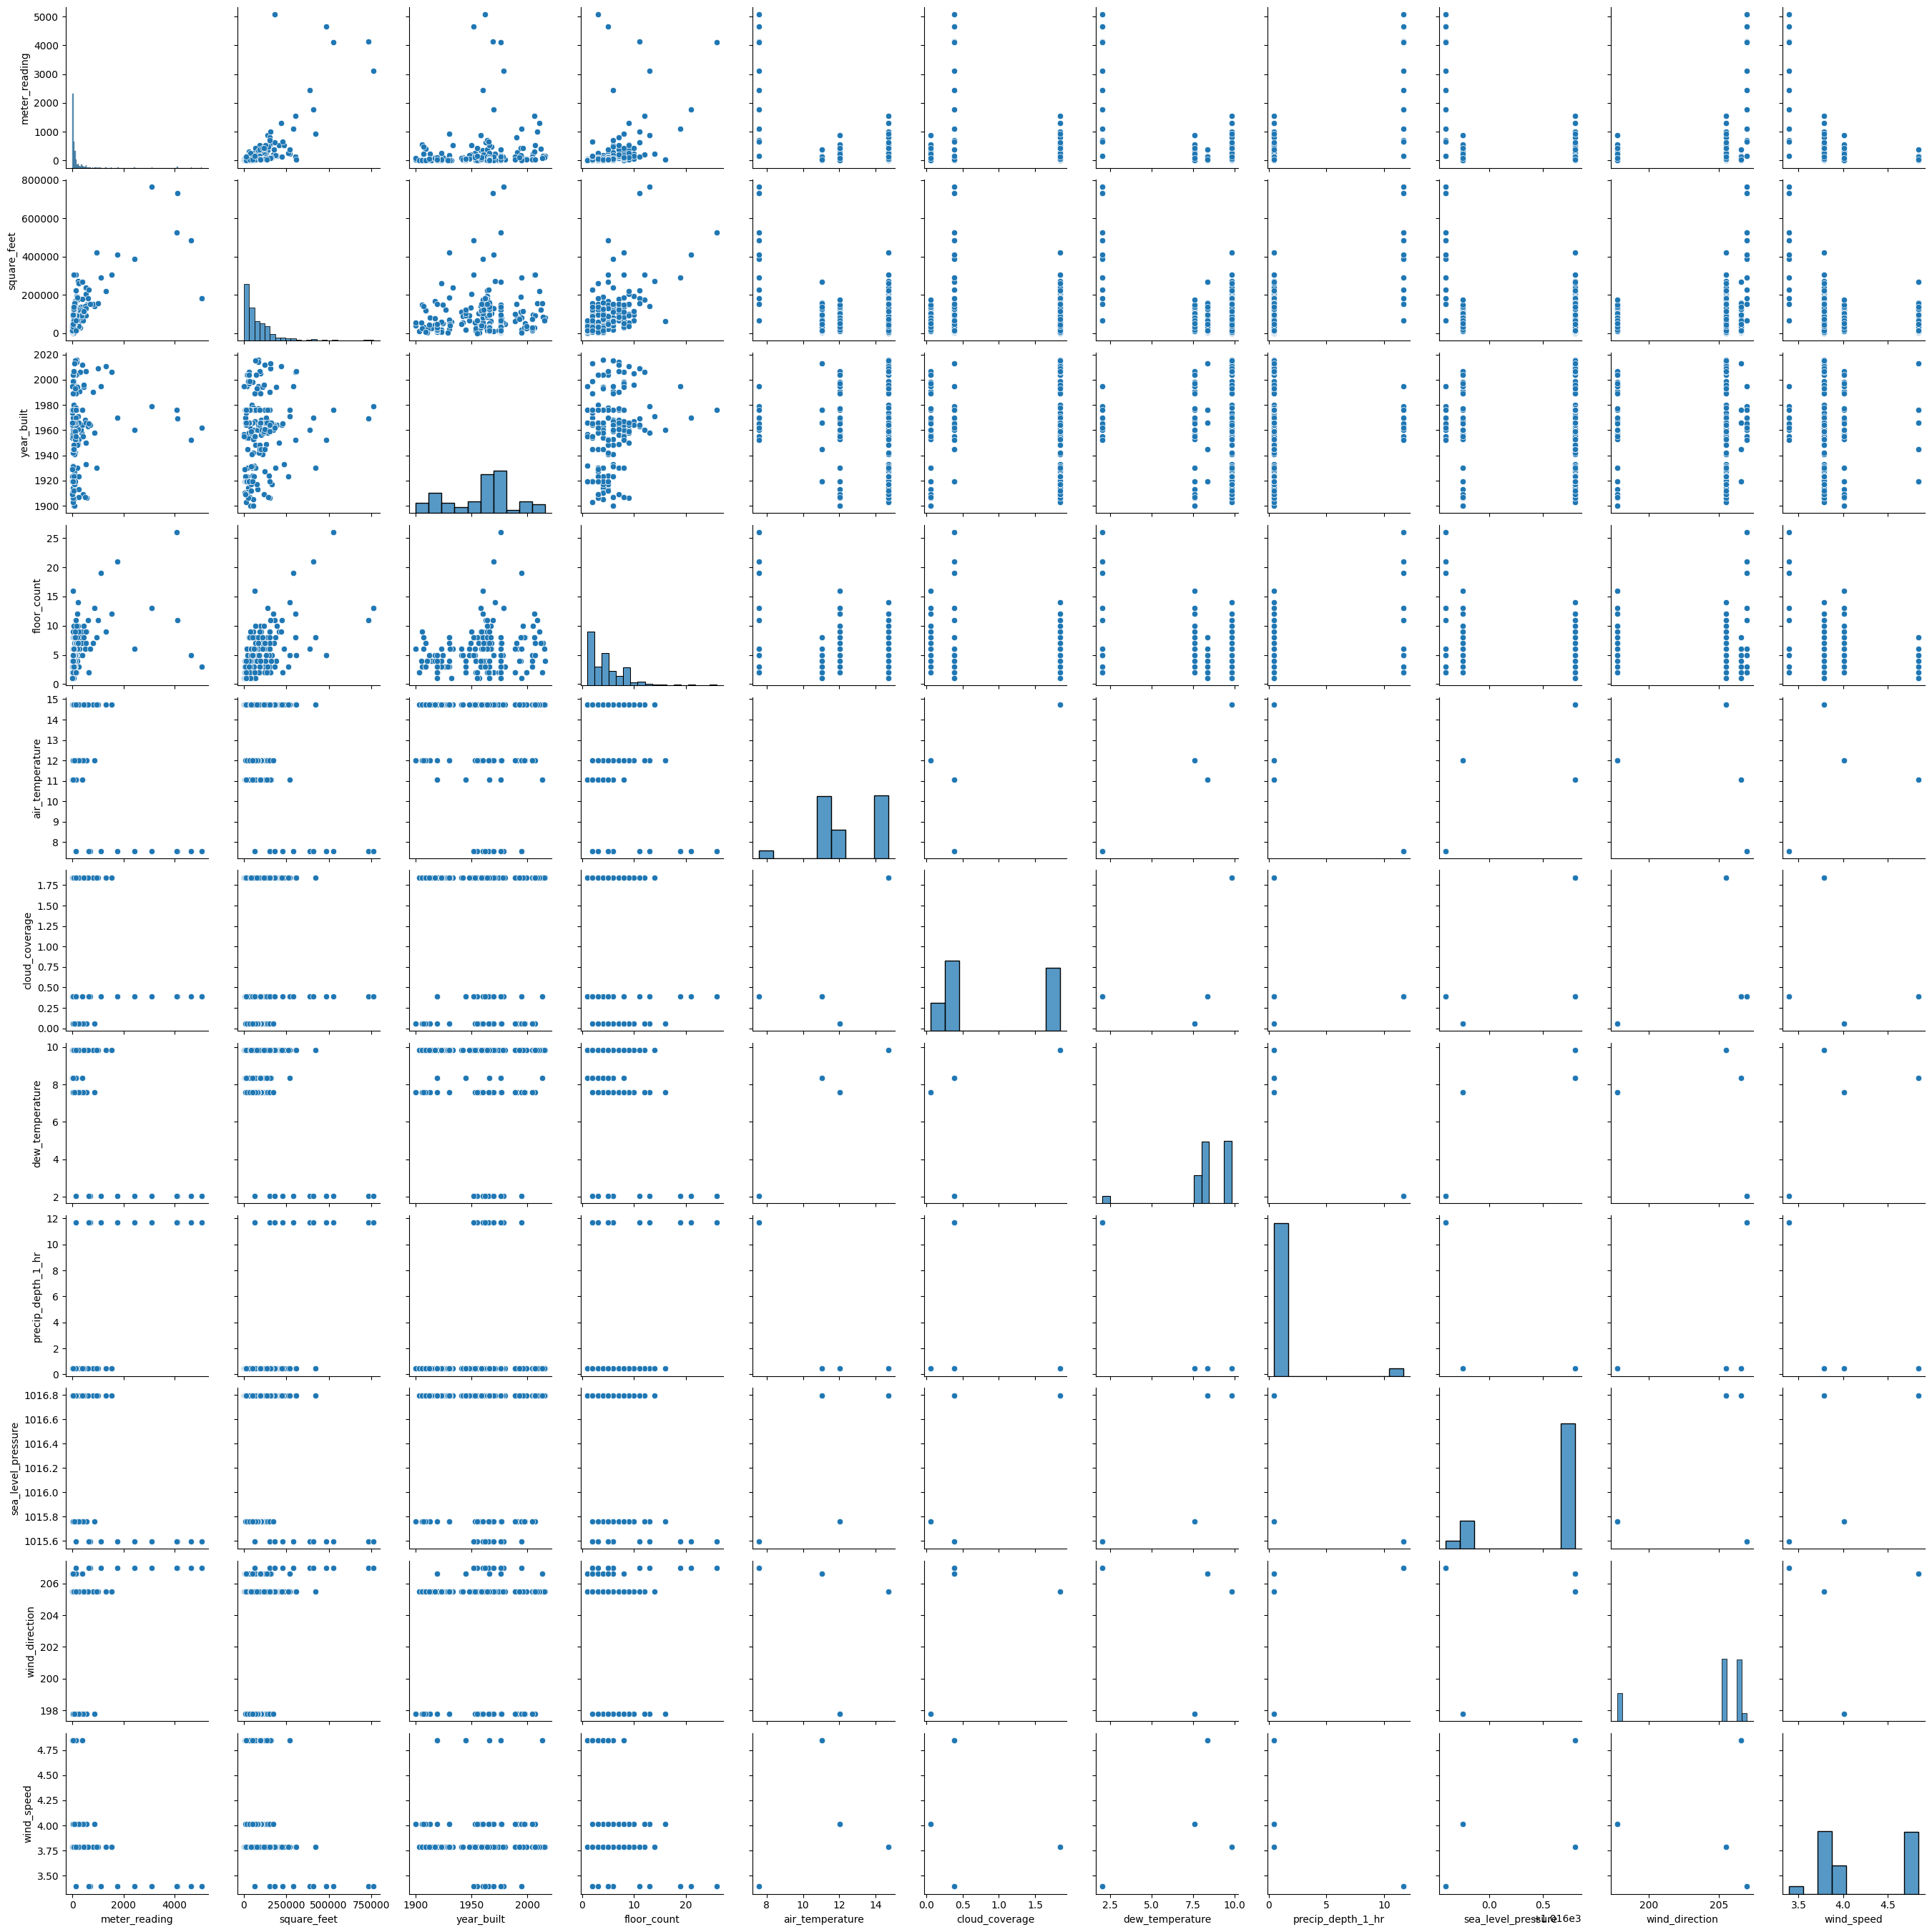

In [10]:
# pairplot
p = sns.pairplot(df)

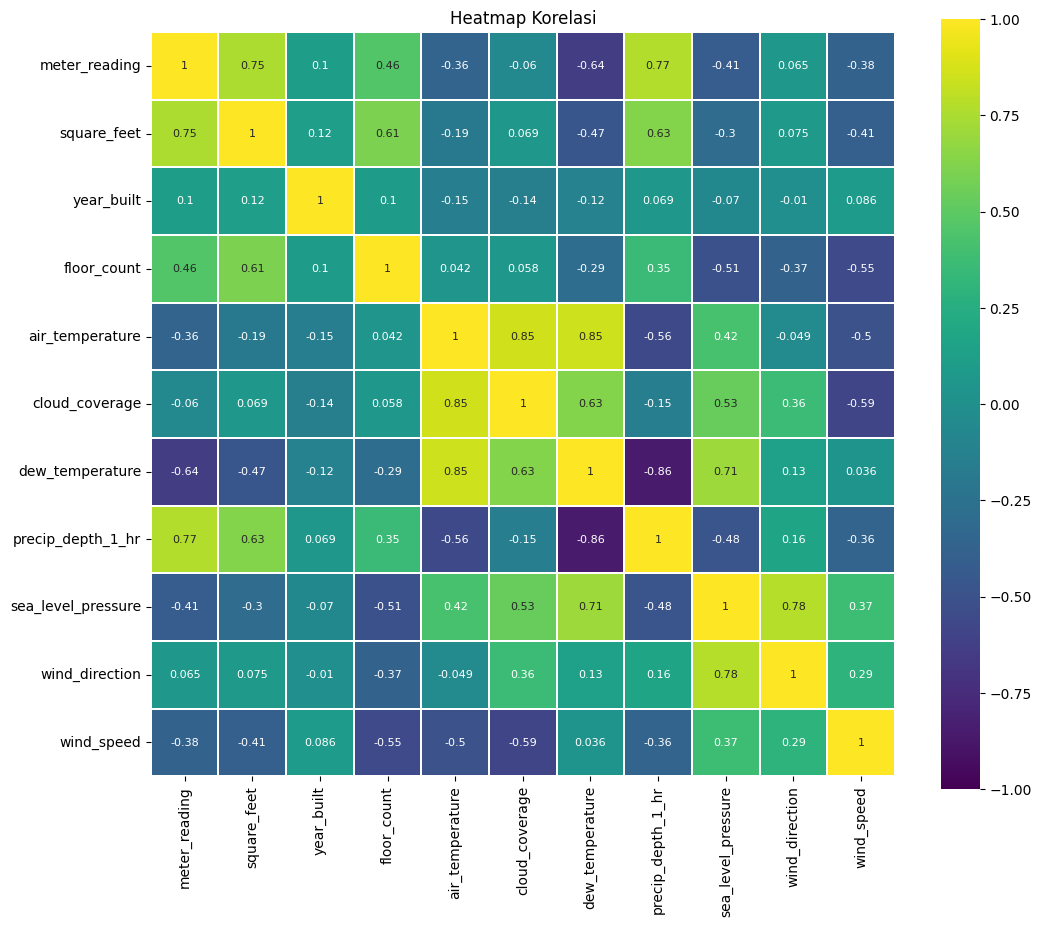

In [11]:
# Memilih hanya kolom numerik
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Perhitungan korelasi
corr2 = numeric_df.corr()

# Visualisasi heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr2, cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1, annot=True, annot_kws={"size": 8}, square=True)
plt.title("Heatmap Korelasi")
plt.show()


# Visualisasi EDA

## Hubungan antara konsumsi energi (kWh/ft^2) dan suhu udara berdasarkan jenis bangunan (primary_use)

Apakah jenis bangunan(primay_use) tertentu lebih sensitif terhadap perubahan suhu udara?

Visualisasi di bawah ini menunjukkan bahwa konsumsi energi (meter reading) tidak memiliki pola hubungan yang kuat dengan suhu udara yang ada dalam data (8°C hingga 15°C). Hal ini mungkin menunjukkan bahwa faktor lain (misalnya, luas bangunan atau jumlah lantai) lebih dominan dalam memengaruhi konsumsi energi.

Bangunan pendidikan (education) , pabrik (Manufacturing/industrial), dan retail menunjukkan konsumsi energi yang cukup tinggi dibandingkan jenis bangunan lainnya pada suhu udara yang sama. Hal ini mungkin karena penggunaan fasilitas yang lebih intensif, seperti pendingin udara, pencahayaan, atau peralatan lainnya.

Bangunan dari kategori yang sama memiliki variasi dalam konsumsi energi, yang bisa disebabkan oleh faktor seperti luas bangunan, jumlah lantai, efisiensi peralatan, atau pola penggunaan bangunan.

**Saran untuk Efisiensi Energi**
1. Gunakan Smart Building Systems, yaitu sistem otomatisasi untuk mengontrol penggunaan energi berdasarkan kebutuhan, seperti sensor cahaya atau termostat pintar untuk HVAC (pemanas dan pendingin udara).
2. Jadwalkan penggunaan peralatan yang memakan energi besar pada waktu-waktu tertentu dan minimalkan penggunaan saat tidak diperlukan.
3. Lakukan audit energi pada bangunan dengan konsumsi tinggi, seperti bangunan pendidikan atau perkantoran, untuk mengidentifikasi perangkat atau area yang kurang efisien.
4. Pertimbangkan untuk mengganti peralatan lama dengan yang lebih hemat energi, seperti lampu LED atau pendingin udara berteknologi inverter.
5. Tingkatkan kesadaran pengguna bangunan tentang praktik hemat energi, seperti mematikan perangkat listrik saat tidak digunakan.

Dengan langkah-langkah ini, konsumsi energi dapat dioptimalkan, sehingga mengurangi biaya operasional dan dampak lingkungan.


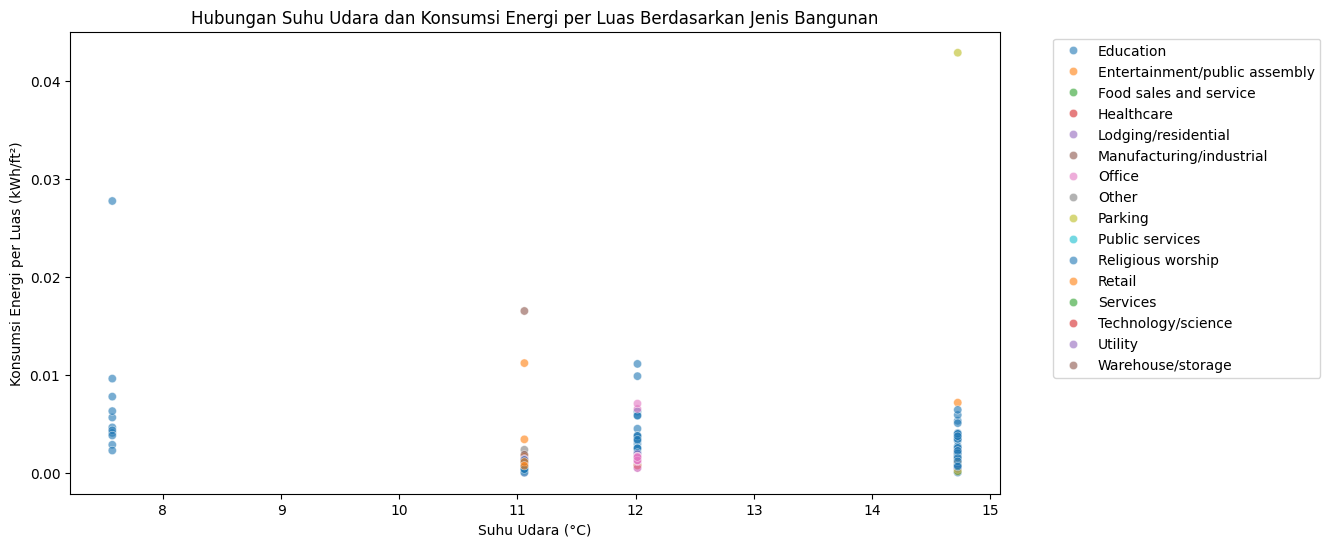

In [12]:
# Menambahkan kolom untuk konsumsi energi per luas bangunan (kWh per square feet)
df['energy_per_sqft'] = df['meter_reading'] / df['square_feet']

# Scatter plot: Konsumsi energi per luas vs Suhu Udara
plt.figure(figsize=(12, 6))
sns.scatterplot(
    x=df['air_temperature'],
    y=df['energy_per_sqft'],
    hue=df['primary_use'],
    alpha=0.6,
    palette='tab10'
)
plt.title("Hubungan Suhu Udara dan Konsumsi Energi per Luas Berdasarkan Jenis Bangunan")
plt.xlabel("Suhu Udara (°C)")
plt.ylabel("Konsumsi Energi per Luas (kWh/ft²)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


## Efek cuaca (curah hujan, kecepatan angin, dan tutupan awan) terhadap konsumsi energi:

Apakah bangunan dengan lebih banyak lantai (floor_count) menunjukkan sensitivitas yang berbeda terhadap kondisi cuaca?

Rentang Persentase Cloud Coverage:
- Rendah (Low): 0-3 oktas (0% - 37.5% langit tertutup awan)
- Menengah (Medium): 4-5 oktas (50% - 62.5% langit tertutup awan)
- Tinggi (High): 6-8 oktas (75% - 100% langit tertutup awan)

Dari data yang sudah melalui pre-processing didapatkan bahwa tutupan awan hanya ada di rentang 0 - 3 oktas, yang artinya semua bangunan dalam data berada di wilayah dengan tutupan awan rendah.

Visualisasi berikut memperjelas bahwa ketika nilai tutupan awan rendah (sekitar 0.059), konsumsi energi relatif stabil dan rendah meskipun masih terdapat outlier dan ketika tutupan awan bertambah (0.388 dan 1.844), konsumsi energi terlihat meningkat secara signifikan, terutama pada bangunan dengan jumlah lantai yang lebih tinggi. Hal ini menunjukkan bahwa bangunan bertingkat cenderung lebih bergantung pada energi terlebih jika bangunan tersebut memiliki tutupan awan yang lebih tinggi. Bangunan dengan jumlah lantai lebih banyak memiliki konsumsi energi yang lebih besar karena kebutuhan pencahayaan, ventilasi, dan sistem pendingin udara yang lebih tinggi. Beberapa outlier (konsumsi energi yang jauh lebih tinggi dibandingkan nilai rata-rata) mungkin disebabkan oleh penggunaan yang intensif di bangunan tertentu atau kurangnya efisiensi energi.

**Saran untuk Pengoptimalan dan Efisiensi Energi**
1. Pasang jendela besar atau kaca efisiensi tinggi pada bangunan agar pencahayaan alami tetap maksimal, terutama saat tutupan awan rendah. Bisa juga gunakan sistem pencahayaan otomatis yang menyesuaikan tingkat pencahayaan buatan dengan kondisi tutupan awan.

2. Untuk bangunan bertingkat, gunakan sistem HVAC yang hemat energi dan dapat diatur per zona lantai. Sistem ini memastikan energi tidak terbuang di area yang tidak digunakan. Selain itu, melakukan pemeliharaan rutin pada sistem HVAC perlu dilakukan untuk menghindari konsumsi energi yang berlebihan.

3. Memasang panel surya untuk mendukung kebutuhan energi, terutama pada bangunan dengan konsumsi tinggi. Pertimbangkan sistem penyimpanan energi untuk mengurangi ketergantungan pada jaringan listrik utama.

4. Lakukan audit energi untuk bangunan yang konsumsi energinya terlalu tinggi pada semua kategori tutupan awan. Identifikasi faktor-faktor yang menyebabkan borosnya energi.

5. Berikan pelatihan kepada penghuni atau pengelola bangunan mengenai cara-cara penghematan energi, seperti mematikan lampu atau perangkat elektronik saat tidak digunakan.

Dengan mengimplementasikan langkah-langkah ini, konsumsi energi dapat lebih efisien yang berdampak pada biaya operasional yang semakin minim serta dampak lingkungan.

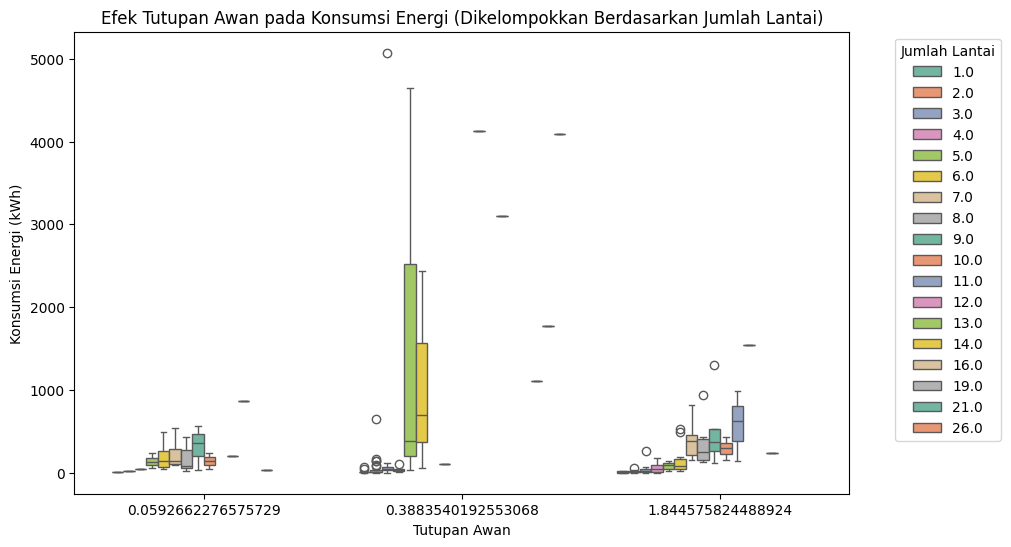

In [13]:
# Membuat kategori cloud_coverage
df['cloud_category'] = pd.cut(df['cloud_coverage'], bins=[0, 1, 2, 3, 4, 5, 6], labels=['0', '1', '2', '3', '4','5' ])

# Boxplot: Konsumsi energi berdasarkan kategori tutupan awan
plt.figure(figsize=(10, 6))
sns.boxplot(
    x=df['cloud_coverage'],
    y=df['meter_reading'],
    hue=df['floor_count'],
    palette='Set2'
)
plt.title("Efek Tutupan Awan pada Konsumsi Energi (Dikelompokkan Berdasarkan Jumlah Lantai)")
plt.xlabel("Tutupan Awan")
plt.ylabel("Konsumsi Energi (kWh)")
plt.legend(title="Jumlah Lantai", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


## Pengaruh tahun pembangunan (year_built) terhadap konsumsi energi (di hitung per-luas bangunan)

Bangunan yang lebih tua mungkin memiliki konsumsi energi lebih tinggi per unit luas lantai (square_feet).

Visualisasi berikut menunjukkan bahwa terjadi lonjakan konsumsi energi yang sangat tinggi pada bangunan yang dibangun tahun 1960. Hal ini mungkin disebabkan oleh perbedaan teknologi konstruksi, perbedaan wilayah, dan/atau kebijakan atau regulasi terkait efisiensi energi yang belum diterapkan secara merata. Meskipun begitu, sebagian besar bangunan menunjukkan tingkat konsumsi energi yang rendah dan stabil, dengan nilai kWh per ft² berada di bawah 0.005.

**Saran untuk Pengoptimalan/Efisiensi Energi**
1. Lakukan modernisasi pada bangunan yang lebih tua dengan menambahkan isolasi termal, mengganti jendela ke model hemat energi, atau menggunakan sistem HVAC (pemanas, ventilasi, dan pendingin udara) yang lebih efisien.
2. Instalasi sistem smart metering dan automasi untuk memonitor dan mengoptimalkan konsumsi energi di bangunan.
3. Dorong penerapan regulasi terkait efisiensi energi pada bangunan baru maupun yang sudah ada, misalnya melalui sertifikasi bangunan hijau.
4. Tingkatkan edukasi kepada pemilik bangunan tentang pentingnya efisiensi energi, baik untuk penghematan biaya maupun dampak lingkungan.

Implementasi langkah-langkah di atas dapat membantu meningkatkan efisiensi energi secara keseluruhan dan mengurangi dampak lingkungan dari konsumsi energi bangunan.

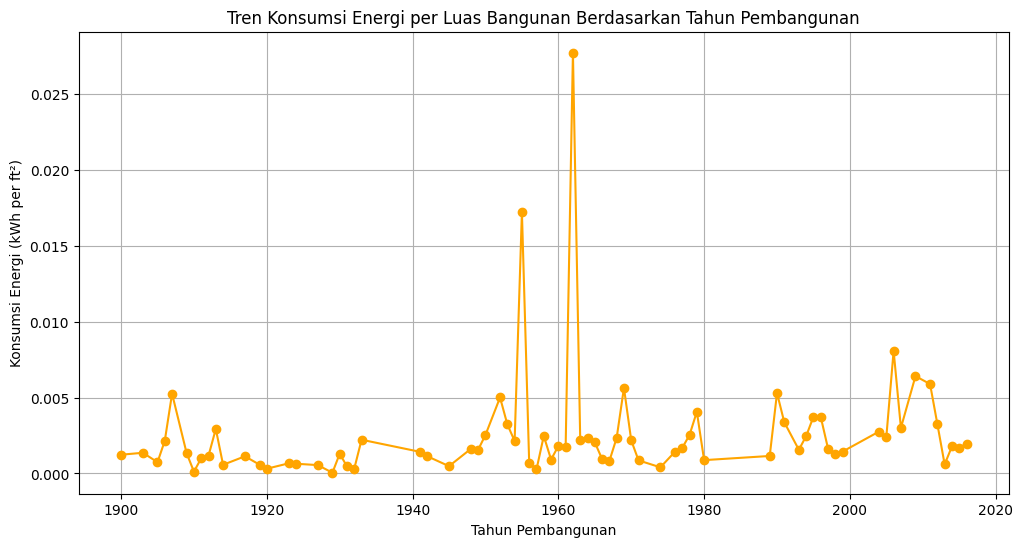

In [14]:
# Menambahkan kolom efisiensi energi
df['konsumsi_energi'] = df['meter_reading'] / df['square_feet']

# Line plot: Efisiensi energi terhadap tahun pembangunan
efficiency_trend = df.groupby('year_built')['konsumsi_energi'].mean().dropna()

plt.figure(figsize=(12, 6))
plt.plot(efficiency_trend.index, efficiency_trend.values, marker='o', color='orange')
plt.title("Tren Konsumsi Energi per Luas Bangunan Berdasarkan Tahun Pembangunan")
plt.xlabel("Tahun Pembangunan")
plt.ylabel("Konsumsi Energi (kWh per ft²)")
plt.grid()
plt.show()


# Model Building

**DATA UNDERSTANDING**

Dataset ini berisi informasi tentang konsumsi energi suatu bangunan dengan berbagai fitur berikut:

1. building_id: ID unik untuk setiap bangunan, berfungsi sebagai foreign key untuk metadata bangunan.
2. meter_reading: Target yang akan diprediksi, yaitu konsumsi energi dalam kWh (atau ekuivalennya). Data ini memiliki kemungkinan error pengukuran.
3. primary_use: Jenis penggunaan utama bangunan berdasarkan definisi EnergyStar property type.
4. square_feet: Luas lantai total bangunan dalam satuan kaki persegi.
5. year_built: Tahun bangunan pertama kali dibangun.
6. floor_count: Jumlah lantai di dalam bangunan.
7. air_temperature: Suhu udara dalam derajat Celsius.
8. cloud_coverage: Persentase langit yang tertutup awan (dalam oktas).
9. dew_temperature: Suhu titik embun dalam derajat Celsius.
10. precip_depth_1_hr: Kedalaman presipitasi (curah hujan) dalam milimeter selama 1 jam.
11. sea_level_pressure: Tekanan udara di permukaan laut dalam millibar/hectopascal.
12. wind_direction: Arah angin berdasarkan derajat (0-360).
13. wind_speed: Kecepatan angin dalam meter per detik.

In [15]:
# Model building dengan metode forward selection
import statsmodels as sm
import statsmodels.formula.api as smf

def forward_selected(data, response):
    """Linear model designed by forward selection.
    https://planspace.org/20150423-forward_selection_with_statsmodels/
    Parameters:
    -----------
    data : pandas DataFrame with all possible predictors and response

    response: string, name of response column in data

    Returns:
    --------
    model: an "optimal" fitted statsmodels linear model
           with an intercept
           selected by forward selection
           evaluated by adjusted R-squared
    """
    remaining = set(data.columns)
    remaining.remove(response)
    selected = []
    current_score, best_new_score = 0.0, 0.0
    while remaining and current_score == best_new_score:
        scores_with_candidates = []
        for candidate in remaining:
            formula = "{} ~ {} + 1".format(response,
                                           ' + '.join(selected + [candidate]))
            score = smf.ols(formula, data).fit().rsquared_adj
            scores_with_candidates.append((score, candidate))
        scores_with_candidates.sort()
        best_new_score, best_candidate = scores_with_candidates.pop()
        if current_score < best_new_score:
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score = best_new_score
    formula = "{} ~ {} + 1".format(response, ' + '.join(selected))
    model = smf.ols(formula, data).fit()
    return model

In [16]:
model_fw = forward_selected(df_no_outlier, 'meter_reading')
print(model_fw.model.formula)
print(model_fw.summary())
residuals = model_fw.resid
rmse = np.sqrt(np.mean(residuals**2))
print(f"RMSE: {rmse:.2f}")

meter_reading ~ floor_count + square_feet + primary_use + sea_level_pressure + wind_speed + year_built + 1
                            OLS Regression Results                            
Dep. Variable:          meter_reading   R-squared:                       0.579
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     16.30
Date:                Sun, 24 Nov 2024   Prob (F-statistic):           3.82e-26
Time:                        15:16:23   Log-Likelihood:                -1014.1
No. Observations:                 194   AIC:                             2060.
Df Residuals:                     178   BIC:                             2112.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                                   coef    std err          t      P>|t|      [0.025   

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:847: RuntimeWarning: invalid value encountered in sqrt
  return self.resid / sigma / np.sqrt(1 - hii)


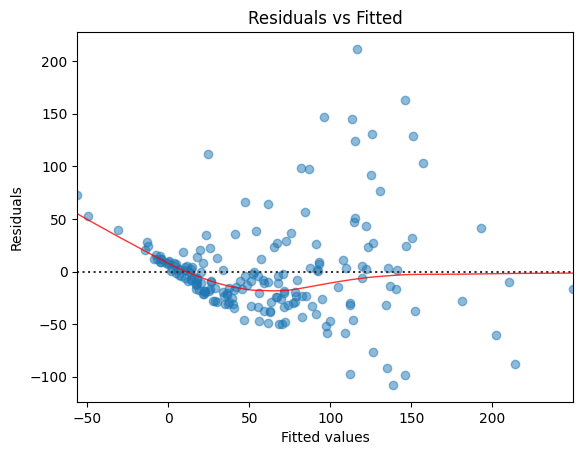

In [17]:
# Plot
model_fitted_y = model_fw.fittedvalues # model residuals
model_residuals = model_fw.resid # normalized residuals
model_norm_residuals = model_fw.get_influence().resid_studentized_internal # absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))
# absolute residuals
model_abs_resid = np.abs(model_residuals)
# leverage, from statsmodels internals
model_leverage = model_fw.get_influence().hat_matrix_diag
# cook's distance, from statsmodels internals
model_cooks = model_fw.get_influence().cooks_distance[0]

plot_lm_1 = plt.figure()
plot_lm_1.axes[0] = sns.residplot(x=model_fitted_y, y=df_no_outlier["meter_reading"],
                                  lowess=True,
                                  scatter_kws={'alpha': 0.5},
                                  line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals');

In [18]:
# Model building manual
model = smf.ols(formula='meter_reading ~ C(primary_use) + square_feet + year_built + floor_count + air_temperature + cloud_coverage + dew_temperature + precip_depth_1_hr + sea_level_pressure + wind_direction + wind_speed', data=df_no_outlier).fit()
print(model.summary())
residuals = model.resid
rmse = np.sqrt(np.mean(residuals**2))
print(f"RMSE: {rmse:.2f}")

                            OLS Regression Results                            
Dep. Variable:          meter_reading   R-squared:                       0.579
Model:                            OLS   Adj. R-squared:                  0.541
Method:                 Least Squares   F-statistic:                     15.24
Date:                Sun, 24 Nov 2024   Prob (F-statistic):           1.38e-25
Time:                        15:16:24   Log-Likelihood:                -1013.9
No. Observations:                 194   AIC:                             2062.
Df Residuals:                     177   BIC:                             2117.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:847: RuntimeWarning: invalid value encountered in sqrt
  return self.resid / sigma / np.sqrt(1 - hii)


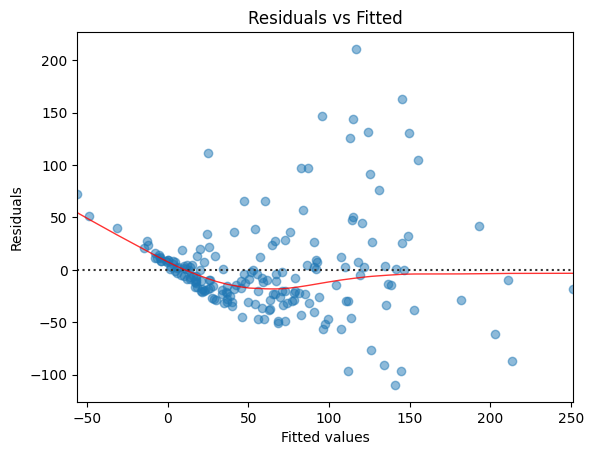

In [19]:
# Plot
model_fitted_y = model.fittedvalues # model residuals
model_residuals = model.resid # normalized residuals
model_norm_residuals = model.get_influence().resid_studentized_internal # absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))
# absolute residuals
model_abs_resid = np.abs(model_residuals)
# leverage, from statsmodels internals
model_leverage = model.get_influence().hat_matrix_diag
# cook's distance, from statsmodels internals
model_cooks = model.get_influence().cooks_distance[0]

plot_lm_1 = plt.figure()
plot_lm_1.axes[0] = sns.residplot(x=model_fitted_y, y=df_no_outlier["meter_reading"],
                                  lowess=True,
                                  scatter_kws={'alpha': 0.5},
                                  line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals');

# Kesimpulan

In [20]:
def calculate_rmse(model, actual_values):
    residuals = model.resid
    rmse = np.sqrt(np.mean(residuals**2))
    return rmse

# Menghitung nilai untuk model_fw
formula_fw = model_fw.model.formula
adjusted_r2_fw = model_fw.rsquared_adj
rmse_fw = calculate_rmse(model_fw, df_no_outlier['meter_reading'])

# Menghitung nilai untuk model
formula = model.model.formula
adjusted_r2 = model.rsquared_adj
rmse = calculate_rmse(model, df_no_outlier['meter_reading'])

# Membuat DataFrame untuk tabel perbandingan
comparison_table = pd.DataFrame({
    "Model": ["model_fw", "model"],
    "RMSE": [rmse_fw, rmse],
    "Adjusted R²": [adjusted_r2_fw, adjusted_r2]
})

# Menampilkan tabel
print(comparison_table)


      Model      RMSE  Adjusted R²
0  model_fw  45.06977     0.543199
1     model  45.03394     0.541348


**Interpretasi**:

1. **RMSE**:
   - `model_fw`: RMSE = 45.06977
   - `model`: RMSE = 45.03394
   - RMSE untuk kedua model sangat mirip, tetapi `model` memiliki nilai yang sedikit lebih rendah dibandingkan dengan `model_fw`. Ini menunjukkan bahwa `model` memiliki performa prediksi yang sedikit lebih baik.

2. **Adjusted R²**:
   - `model_fw`: Adjusted R² = 0.543199
   - `model`: Adjusted R² = 0.541348
   - `model_fw` memiliki nilai Adjusted R² yang sedikit lebih tinggi dibandingkan `model`. Ini berarti bahwa `model_fw` sedikit lebih baik dalam menjelaskan variasi data yang ada, meskipun perbedaan antara kedua model sangat kecil.

3. **Keseimbangan antara RMSE dan Adjusted R²**:
   - `model` memiliki RMSE yang sedikit lebih kecil (lebih baik), tetapi `model_fw` memiliki Adjusted R² yang sedikit lebih tinggi (lebih baik untuk penjelasan variabilitas data). Ini menunjukkan bahwa tidak ada perbedaan yang signifikan antara kedua model dalam performanya.


**Kesimpulan**:

- Tidak ada perbedaan signifikan antara `model_fw` dan `model` dalam performa prediksi atau kemampuan menjelaskan variabilitas data.
- Jika prioritas adalah **akurasi prediksi**, maka `model` lebih unggul karena memiliki RMSE yang lebih rendah.
- Jika prioritas adalah **kemampuan menjelaskan variasi data**, maka `model_fw` lebih unggul karena Adjusted R² yang lebih tinggi.
- Dalam situasi ini, keduanya bisa dianggap hampir setara. **Oleh karena itu, model regresi linier ini tidak akan digunakan dalam analisis regresi ini**. Model regresi lainnya dibahas pada collab selanjutnya.